In [1]:
# Instalação do pacote yfinance
#No VSCode utiliza o "%" no ligar do "!"
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Instalação das bibliotecas padrão
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Instação da biblioteca yfinance
import yfinance as yf

In [3]:
# Ajuste para o matplotlib e Pandas
%matplotlib inline

#float_format configurado para 6 casas decimais '%.6f' de notação cientifica para num. real
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.6f' % x) 

In [17]:
# Criação de função referente a busca de dados da Selic
# Importante verificar a documentação conforme arquivo README.md para coleta dos dados na API do Banco Central (BC)
# Correção do DataFrame para ter a data como indice e corrigir o valor da selic de % para numeral
def BC_data_extract (code, start_date, end_date):
    url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}'.format(code, start_date, end_date)
    df = pd.read_json(url)
    df = df.set_index('data')
    df.index = pd.to_datetime(df.index, dayfirst=True)
    df.columns = ['SELIC'] 
    df['SELIC'] = df['SELIC'] / 100
    return df
 

In [18]:
# Base de dados
dados = BC_data_extract(4390, '01/01/2010', '21/12/2023')
dados.head()

,SELIC
data,
2010-01-01,0.006600
2010-02-01,0.005900
2010-03-01,0.007600
2010-04-01,0.006700
2010-05-01,0.007500


In [19]:
#Relação de 4 ativos com maior liqudez na B3
ativos = ['PETR4', 'VALE3', 'ITUB4', 'BBDC4']

for i in ativos:
  dados[i] = yf.download(i+'.SA',
                         start='2010-01-01',
                         end='2023-12-31',
                         interval='1mo')['Adj Close'].pct_change()
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [20]:
dados

,SELIC,PETR4,VALE3,ITUB4,BBDC4
data,,,,,
2010-01-01,0.006600,NaN,NaN,NaN,NaN
2010-02-01,0.005900,0.012877,0.031487,0.010241,-0.010151
2010-03-01,0.007600,0.022537,0.132805,0.068492,0.001208
2010-04-01,0.006700,-0.073184,-0.070867,-0.033333,0.000469
2010-05-01,0.007500,-0.093997,-0.051699,-0.079575,0.000469
2010-06-01,0.007900,-0.086940,-0.127000,-0.063102,0.000469
2010-07-01,0.008600,0.036858,0.112256,0.218576,0.045716
2010-08-01,0.008900,-0.064273,-0.034397,-0.044356,-0.055061
2010-09-01,0.008500,0.053631,0.115615,0.076279,0.114091


In [21]:
#tratamento de dados do DataFrame
#Retirando a 1ª linha e adicionado 1 em todos campos de dados
dados = dados[1:]
dados = dados + 1
dados

,SELIC,PETR4,VALE3,ITUB4,BBDC4
data,,,,,
2010-02-01,1.005900,1.012877,1.031487,1.010241,0.989849
2010-03-01,1.007600,1.022537,1.132805,1.068492,1.001208
2010-04-01,1.006700,0.926816,0.929133,0.966667,1.000469
2010-05-01,1.007500,0.906003,0.948301,0.920425,1.000469
2010-06-01,1.007900,0.913060,0.873000,0.936898,1.000469
2010-07-01,1.008600,1.036858,1.112256,1.218576,1.045716
2010-08-01,1.008900,0.935727,0.965603,0.955644,0.944939
2010-09-01,1.008500,1.053631,1.115615,1.076279,1.114091
2010-10-01,1.008100,0.947233,1.024856,1.025776,1.033796


In [22]:
#Utilização da função Pandas dataframe.cumprod()
#É usado para encontrar o produto cumulativo dos valores vistos até agora em qualquer eixo.
#Referência: https://acervolima.com/python-pandas-dataframe-cumprod/
acumulado = dados.cumprod()
acumulado

,SELIC,PETR4,VALE3,ITUB4,BBDC4
data,,,,,
2010-02-01,1.005900,1.012877,1.031487,1.010241,0.989849
2010-03-01,1.013545,1.035704,1.168473,1.079434,0.991045
2010-04-01,1.020336,0.959907,1.085667,1.043453,0.991510
2010-05-01,1.027988,0.869678,1.029539,0.960420,0.991975
2010-06-01,1.036109,0.794069,0.898788,0.899815,0.992440
2010-07-01,1.045020,0.823337,0.999683,1.096493,1.037811
2010-08-01,1.054320,0.770418,0.965296,1.047857,0.980668
2010-09-01,1.063282,0.811736,1.076898,1.127786,1.092554
2010-10-01,1.071895,0.768904,1.103666,1.156856,1.129478


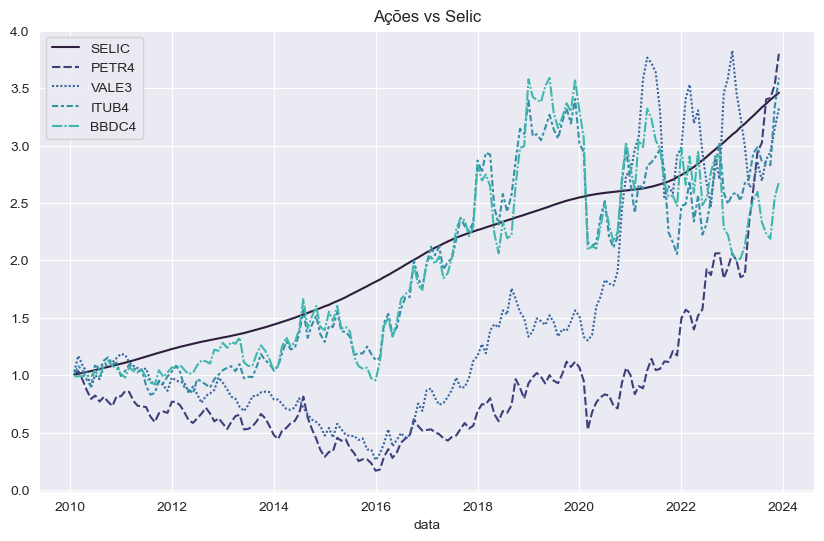

In [30]:
#Gráfico comparativo
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.set_palette('mako')
plt.title('Ações vs Selic')
sns.lineplot(data = acumulado)



#Gráfico salvo na pasta de figuras
plt.savefig(r'E:\DS\financial\proj1\figure\selicversusacoes.png', format = 'png')

In [24]:
acumulado.corr()

,SELIC,PETR4,VALE3,ITUB4,BBDC4
SELIC,1.000000,0.674516,0.769498,0.892080,0.820585
PETR4,0.674516,1.000000,0.753005,0.551736,0.420707
VALE3,0.769498,0.753005,1.000000,0.660040,0.629124
ITUB4,0.892080,0.551736,0.660040,1.000000,0.960595
BBDC4,0.820585,0.420707,0.629124,0.960595,1.000000


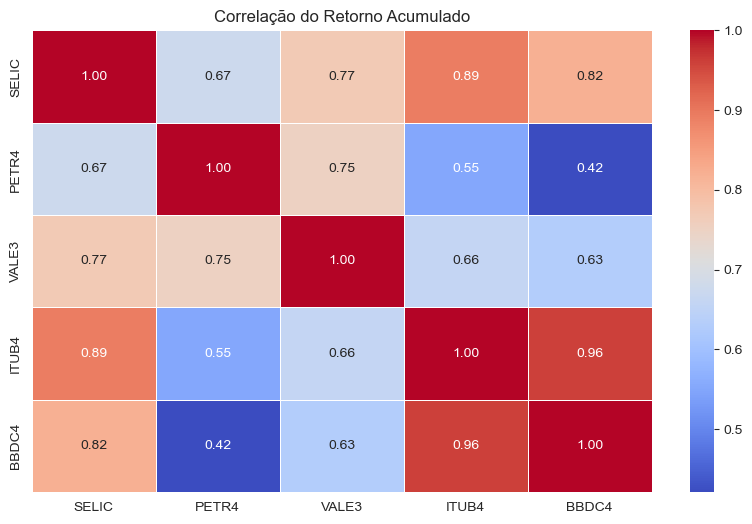

In [29]:
plt.figure(figsize =(10,6))
plt.title('Correlação do Retorno Acumulado')
sns.heatmap(acumulado.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.savefig(r'E:\DS\financial\proj1\figure\matrizdecorrelacao.png', format = 'png')